# Sistemas de Recomendación

## Ingenieria en Desarollo y Gestion de Software 9ºA

## Creado por:  Eliel Díaz Galindo 200327


#### Práctica No.  19 : Carga de Datos de dataset


In [1]:
import pandas as pd #Esta línea de código importa la librería pandas y le asigna el alias "pd". Esta es una práctica común para hacer que el código sea más corto y fácil de leer al usar las funciones de pandas.

In [64]:
df = pd.read_csv("C:\\Users\\PC 15\\Desktop\\ml-100k\\u.data.csv", delimiter="\t", header=None)

In [65]:
type(df)

pandas.core.frame.DataFrame

In [66]:
df.head()

0    1  2          3
0  196  242  3  881250949
1  186  302  3  891717742
2   22  377  1  878887116
3  244   51  2  880606923
4  166  346  1  886397596

In [67]:
df.shape #La función df.shape en el contexto de la biblioteca Pandas en Python se utiliza para obtener la dimensión de un DataFrame, que es una estructura de datos bidimensional similar a una tabla. La función devuelve una tupla que contiene dos valores: el número de filas y el número de columnas en el DataFrame.

(100000, 4)

In [68]:
df.columns

Int64Index([0, 1, 2, 3], dtype='int64')

In [69]:
df.columns = ["UserID", "ItemID", "Rating", "TimeStamp"]#puedes usar la línea de código que proporcionaste para cambiar los nombres de las columnas a "UserID", "ItemID", "Rating" y "TimeStamp"

In [70]:
df.head()


UserID  ItemID  Rating  TimeStamp
0     196     242       3  881250949
1     186     302       3  891717742
2      22     377       1  878887116
3     244      51       2  880606923
4     166     346       1  886397596

### Práctica No.  20 : Análisis Exploratorio de los Datos.


In [71]:
import matplotlib.pyplot as plt #se utiliza para importar el módulo matplotlib.pyplot en Python. Matplotlib es una librería ampliamente utilizada para la creación de gráficos y visualizaciones en Python. 

(array([ 6110.,     0., 11370.,     0.,     0., 27145.,     0., 34174.,
            0., 21201.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

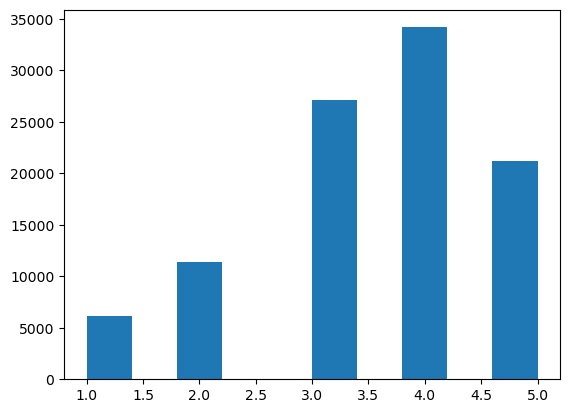

In [72]:
plt.hist(df.Rating)

(array([11459.,  5724., 19359.,  9315.,  9396., 10083.,  6175.,  9603.,
        10048.,  8838.]),
 array([8.74724710e+08, 8.76580903e+08, 8.78437096e+08, 8.80293288e+08,
        8.82149481e+08, 8.84005674e+08, 8.85861867e+08, 8.87718060e+08,
        8.89574252e+08, 8.91430445e+08, 8.93286638e+08]),
 <BarContainer object of 10 artists>)

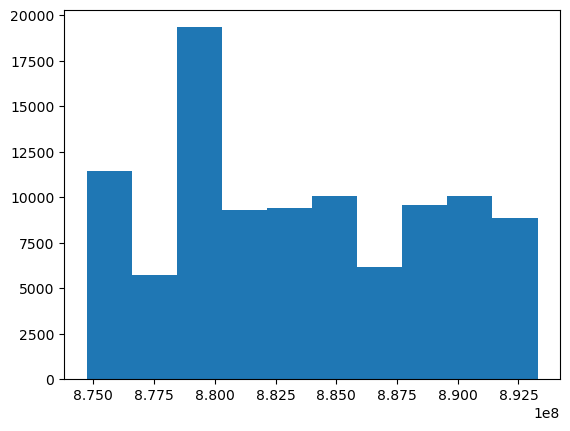

In [73]:
plt.hist(df.TimeStamp)

In [74]:
df.groupby(["Rating"])["UserID"].count()

Rating
1     6110
2    11370
3    27145
4    34174
5    21201
Name: UserID, dtype: int64

In [75]:
df.groupby(["ItemID"])["ItemID"].count()

ItemID
1       452
2       131
3        90
4       209
5        86
       ... 
1678      1
1679      1
1680      1
1681      1
1682      1
Name: ItemID, Length: 1682, dtype: int64

(array([1.146e+03, 2.490e+02, 1.390e+02, 6.700e+01, 3.800e+01, 2.400e+01,
        7.000e+00, 5.000e+00, 6.000e+00, 1.000e+00]),
 array([  1. ,  59.2, 117.4, 175.6, 233.8, 292. , 350.2, 408.4, 466.6,
        524.8, 583. ]),
 <BarContainer object of 10 artists>)

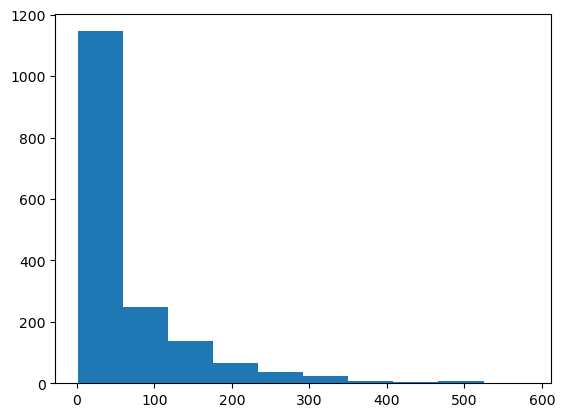

In [76]:
plt.hist(df.groupby(["ItemID"])["ItemID"].count())

In [77]:
df.groupby(["ItemID"]).count()

UserID  Rating  TimeStamp
ItemID                           
1          452     452        452
2          131     131        131
3           90      90         90
4          209     209        209
5           86      86         86
...        ...     ...        ...
1678         1       1          1
1679         1       1          1
1680         1       1          1
1681         1       1          1
1682         1       1          1

[1682 rows x 3 columns]

In [78]:
df.groupby(["Rating"]).count()

UserID  ItemID  TimeStamp
Rating                           
1         6110    6110       6110
2        11370   11370      11370
3        27145   27145      27145
4        34174   34174      34174
5        21201   21201      21201

### Practica21: Representación en forma Matricial

In [79]:
import numpy as np #NumPy es una librería fundamental en el ecosistema de Python para la computación científica y numérica. Proporciona soporte para arrays multidimensionales (llamados arreglos en NumPy) y una amplia gama de funciones matemáticas y operaciones que son útiles para el procesamiento numérico y científico.

In [80]:
n_users = df.UserID.unique().shape[0]
n_users #En resumen, el código calcula la cantidad de usuarios únicos en el DataFrame df y almacena este valor en la variable n_users. Esto puede ser útil para entender cuántos usuarios diferentes están presentes en un conjunto de datos,

943

In [81]:
n_items = df.ItemID.unique().shape[0]
n_items #En resumen, el código calcula la cantidad de ítems únicos en el DataFrame df y almacena este valor en la variable n_items. Esto puede ser útil para comprender cuántos ítems distintos están presentes en un conjunto de datos, lo que puede ser relevante para análisis y modelado posteriores

1682

In [82]:
ratings = np.zeros((n_users, n_items))
ratings # En otras palabras, estás creando una matriz donde las filas representan usuarios y las columnas representan ítems.

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [83]:
for row in df.itertuples():
    ratings[row[1]-1, row[2]-1] = row[3] #En resumen, este bucle recorre cada fila del DataFrame df, obtiene la calificación de esa fila y la coloca en la posición correspondiente en la matriz de calificaciones "ratings". Esto es típico en el proceso de preparación de datos para sistemas de recomendación, donde se crea una matriz de interacciones usuario-ítem y se llena con valores de calificación.

In [84]:
type(ratings)

numpy.ndarray

In [85]:
ratings.shape

(943, 1682)

In [86]:
 ratings

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [87]:
sparsity = float(len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0]*ratings.shape[1])
sparsity *= 100
print("Coeficiente de sparseidad: {:4.2f}%".format(sparsity))#este código se utiliza para calcular y mostrar cuántos elementos en la matriz de calificaciones están ocupados en comparación con el total posible. Una matriz más "densa" tendría una esparcidad más baja, mientras que una matriz más "dispersa" tendría una esparcidad más alta. El coeficiente de esparcidad es útil para comprender cuántos valores de calificación son conocidos en relación con todos los valores posibles en un conjunto de datos, lo que puede influir en el diseño de sistemas de recomendación y análisis posteriores.

Coeficiente de sparseidad: 6.30%


## Practica 22: Crear Conjuntos de Entrenamiento y validacion para el algoritmo de recomendacion

In [88]:
from sklearn.model_selection import train_test_split #La función train_test_split se utiliza para dividir un conjunto de datos en dos subconjuntos: uno destinado al entrenamiento de un modelo y otro destinado a la evaluación del modelo.

In [89]:
ratings_train, ratings_test = train_test_split(ratings, test_size=0.3, random_state=42) #n resumen, el código divide la matriz de calificaciones en dos subconjuntos: ratings_train, que se utilizará para entrenar un modelo, y ratings_test, que se utilizará para evaluar el rendimiento del modelo. 

In [90]:
ratings_train.shape

(660, 1682)

In [91]:
ratings_test.shape

(283, 1682)

## Practica 23: Filtro colaborativo basado en Usuario.
** Matris de similaridad entre los Usuarios(Distancia de consenos).

** Predecir la valoracion desconocida para un item *i* para un usuario activo *u* basadonse en la suma ponderada de todas
las valoraciones del resto de usuarios para dicho item

** Recomendaremos los nuevos items a los usuarios segun lo establecido en los pasos anteriores

In [92]:
import numpy as np
import sklearn #En resumen, import numpy as np importa la librería NumPy, que es esencial para la computación numérica y científica. Y import sklearn importa la librería scikit-learn (sklearn), que es ampliamente utilizada para el desarrollo de modelos de aprendizaje automático y análisis de datos en Python.

In [93]:
sim_matrix = 1 - sklearn.metrics.pairwise.cosine_distances(ratings_train)#se utiliza para calcular una matriz de similitud entre los datos de entrenamiento utilizando la distancia del coseno.La variable sim_matrix almacenará la matriz de similitud resultante, donde los valores más altos indican mayor similitud entre los elementos (filas) de ratings_train.

In [94]:
type(sim_matrix)

numpy.ndarray

In [95]:
sim_matrix.shape #Si utilizas sim_matrix.shape, obtendrás una tupla con dos valores: el número de filas y el número de columnas de la matriz de similitud.

(660, 660)

In [96]:
sim_matrix

array([[1.        , 0.17448349, 0.18009754, ..., 0.13331459, 0.17695593,
        0.21882481],
       [0.17448349, 1.        , 0.07993097, ..., 0.07175808, 0.09552622,
        0.05512655],
       [0.18009754, 0.07993097, 1.        , ..., 0.0191736 , 0.02233385,
        0.10310785],
       ...,
       [0.13331459, 0.07175808, 0.0191736 , ..., 1.        , 0.04853428,
        0.05142508],
       [0.17695593, 0.09552622, 0.02233385, ..., 0.04853428, 1.        ,
        0.1198022 ],
       [0.21882481, 0.05512655, 0.10310785, ..., 0.05142508, 0.1198022 ,
        1.        ]])

In [97]:
user_predictions = sim_matrix.dot(ratings_train) / np.array([np.abs(sim_matrix).sum(axis=1)]).T #En resumen, el código calcula las predicciones de calificación para los usuarios basadas en la similitud entre usuarios y las calificaciones de entrenamiento.se utiliza para calcular las predicciones de calificación para los usuarios basadas en la matriz de similitud y las calificaciones de entrenamiento.

In [98]:
user_predictions

array([[2.10259747e+00, 5.86975978e-01, 3.40264192e-01, ...,
        0.00000000e+00, 7.33611460e-03, 6.04379414e-03],
       [1.40999723e+00, 2.91863934e-01, 2.68085289e-01, ...,
        0.00000000e+00, 3.50378592e-03, 2.32963985e-03],
       [1.69014833e+00, 3.13648440e-01, 3.26127887e-01, ...,
        0.00000000e+00, 3.25391767e-03, 1.77210119e-03],
       ...,
       [1.73393747e+00, 4.06719333e-01, 3.21166908e-01, ...,
        0.00000000e+00, 2.71269625e-03, 9.00511411e-03],
       [2.34361031e+00, 8.10544770e-01, 4.73941025e-01, ...,
        0.00000000e+00, 1.01130066e-02, 9.66427605e-03],
       [2.36796969e+00, 5.98146138e-01, 3.85569804e-01, ...,
        0.00000000e+00, 6.39996638e-03, 5.37442746e-03]])

In [99]:
user_predictions.shape

(660, 1682)

In [100]:
from sklearn.metrics import mean_squared_error #n el contexto de sistemas de recomendación, puedes utilizar mean_squared_error para evaluar la calidad de las predicciones de calificación realizadas por tu modelo en comparación con las calificaciones reales de los usuarios.

In [118]:
def get_mse(preds, actuals):
    if preds.shape[0] != actuals.shape[0]:
        actuals = actuals.T
    preds = preds[actuals.nonzero()].flatten()
    actuals = actuals[actuals.nonzero()].flatten()
    return mean_squared_error(preds,actuals) #La función get_mse que proporcionaste se utiliza para calcular el error cuadrático medio (MSE) entre las predicciones y los valores reales, teniendo en cuenta las restricciones asociadas con las matrices dispersas. En resumen, flatten() se utiliza para convertir arrays multidimensionales en arrays unidimensionales.

In [119]:
get_mse(user_predictions, ratings_train)#utiliza la función get_mse que definiste previamente para calcular el error cuadrático medio (MSE) entre las predicciones (user_predictions) y las calificaciones de entrenamiento (ratings_train) en el contexto de un sistema de recomendación.

7.878218313143215

## Practica 24: Filtro colaborativo con los K-Nearest Neighbors(KNN)

In [120]:
from sklearn.neighbors import NearestNeighbors #se utiliza para importar la clase NearestNeighbors de la librería scikit-learn (sklearn) en Python. La clase NearestNeighbors se utiliza para realizar búsqueda de vecinos cercanos en un conjunto de datos, lo que es útil en una variedad de aplicaciones, incluyendo sistemas de recomendación, agrupamiento (clustering), reducción de dimensionalidad y otros análisis de datos.

In [137]:
k = 6

In [138]:
neighbors = NearestNeighbors(n_neighbors=k, metric='cosine') #n_neighbors=k: Aquí, k es el número de vecinos más cercanos que deseas encontrar. Este valor controlará cuántos vecinos cercanos se considerarán al realizar búsquedas de vecinos.metric='cosine': Estás configurando la métrica de distancia a 'cosine', lo que significa que la búsqueda de vecinos cercanos se realizará utilizando la similitud del coseno como medida de distancia. 

In [139]:
neighbors.fit(ratings_train)

NearestNeighbors(metric='cosine', n_neighbors=6)

In [140]:
top_k_distances, top_k_users = neighbors.kneighbors(ratings_train, return_distance= True) #En resumen, después de ejecutar este código, tendrás acceso a las distancias y los índices de los k vecinos más cercanos para cada usuario en función de sus interacciones registradas en la matriz ratings_train

In [141]:
top_k_distances.shape

(660, 6)

In [142]:
top_k_distances[0]

array([0.        , 0.49780748, 0.55784838, 0.56965585, 0.57163621,
       0.57520588])

In [143]:
top_k_users[0]

array([  0, 211,  16, 185, 101, 155], dtype=int64)

In [144]:
users_predicts_k = np.zeros(ratings_train.shape)

In [145]:
users_predicts_k

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [146]:
for i in range(ratings_train.shape[0]):
    users_predicts_k[i, :] = top_k_distances[i].T.dot(ratings_train[top_k_users][i]) / np.array([np.abs(top_k_distances[i].T).sum(axis=0)]).T#El bucle recorre cada usuario en ratings_train y calcula las predicciones de calificación basadas en la similitud con sus vecinos más cercanos. Las predicciones se almacenan en users_predicts_k, donde cada fila corresponde a un usuario y cada columna corresponde a un ítem.

In [147]:
users_predicts_k.shape

(660, 1682)

In [148]:
users_predicts_k[0]

array([0.82997687, 0.82997687, 0.        , ..., 0.        , 0.        ,
       0.        ])

In [149]:
get_mse(users_predicts_k, ratings_train)#utiliza la función get_mse que definiste previamente para calcular el error cuadrático medio (MSE) entre las predicciones (users_predicts_k) y las calificaciones de entrenamiento (ratings_train) basadas en el enfoque de filtrado colaborativo utilizando vecinos cercanos.

4.305247677720045

## Practica 25: Filtro colaborativo basado en items

In [177]:
n_movies = ratings_train.shape[1]
n_movies#a variable n_movies se utiliza para almacenar el número de ítems (películas en este caso) en la matriz de calificaciones ratings_train. La dimensión ratings_train.shape[1] se refiere al número de columnas en la matriz, que corresponde a la cantidad de ítems.

1682

In [178]:
neighbors_item = NearestNeighbors(n_neighbors=n_movies, metric='cosine')#Esta configuración puede ser útil para encontrar ítems similares basados en la similitud de contenido (características, atributos) en lugar de similitudes entre usuarios. Es común en sistemas de recomendación que combinen enfoques de vecinos cercanos tanto para usuarios como para ítems, a fin de proporcionar recomendaciones más completas y precisas.

In [179]:
neighbors_item.fit(ratings_train.T)#se utiliza para ajustar (entrenar) el modelo de búsqueda de vecinos cercanos (neighbors_item) utilizando la matriz de calificaciones transpuesta (ratings_train.T). En este caso, estás ajustando el modelo para encontrar vecinos cercanos basados en la similitud del coseno entre los ítems.

NearestNeighbors(metric='cosine', n_neighbors=1682)

In [183]:
top_k_distances, top_k_item = neighbors_item.kneighbors(ratings_train.T, return_distance=True)#e utiliza para encontrar los k ítems más cercanos para cada ítem en función de la similitud del coseno utilizando la instancia neighbors_item de la clase NearestNeighbors. También almacena las distancias correspondientes a esos ítems más cercanos en la matriz top_k_distances y los índices de los ítems vecinos en la matriz top_k_item.En resumen, después de ejecutar este código, tendrás acceso a las distancias y los índices de los k ítems más cercanos para cada ítem en función de la similitud del coseno utilizando el enfoque de vecinos más cercanos para ítems. Esto puede ser útil para identificar ítems similares a un ítem dado en función de sus características o atributos.

In [184]:
top_k_distances.shape

(1682, 1682)

In [185]:
top_k_item

array([[   0,   49,  180, ..., 1589, 1602, 1679],
       [   1,  232,  160, ..., 1323, 1338, 1679],
       [   2,  762,  409, ..., 1433, 1103, 1680],
       ...,
       [   0, 1127, 1126, ...,  553,  577, 1681],
       [1671, 1680, 1422, ...,  735,  747, 1681],
       [1681, 1596,  766, ...,  700,  715, 1680]], dtype=int64)

In [186]:
top_k_item

array([[   0,   49,  180, ..., 1589, 1602, 1679],
       [   1,  232,  160, ..., 1323, 1338, 1679],
       [   2,  762,  409, ..., 1433, 1103, 1680],
       ...,
       [   0, 1127, 1126, ...,  553,  577, 1681],
       [1671, 1680, 1422, ...,  735,  747, 1681],
       [1681, 1596,  766, ...,  700,  715, 1680]], dtype=int64)

In [187]:
item_predicts_k = np.zeros(ratings_train.shape)#se utiliza para crear una matriz de ceros del mismo tamaño que la matriz de calificaciones ratings_train. La variable item_predicts_k se utiliza para almacenar las predicciones de calificación basadas en el enfoque de vecinos cercanos para ítems.

In [188]:
item_preds = ratings_train.dot(top_k_distances) / np.array([np.abs(top_k_distances).sum(axis=0)]) #En resumen, este código calcula las predicciones de calificación para los ítems basadas en el enfoque de vecinos cercanos para ítems. Cada predicción se basa en la calificación de los usuarios y la similitud de los vecinos cercanos para el ítem correspondiente. Estas predicciones se almacenan en la matriz item_preds, donde cada fila representa un usuario y cada columna representa un ítem.

In [189]:
item_preds.shape

(660, 1682)

In [190]:
item_preds

array([[5.33714487e-15, 3.42801621e-01, 3.37477976e-01, ...,
        3.53151011e-01, 3.53151011e-01, 3.53151011e-01],
       [9.12401468e-16, 5.22904770e-02, 5.02599254e-02, ...,
        4.81569560e-02, 4.81569560e-02, 4.81569560e-02],
       [5.20795528e-16, 4.85145238e-02, 4.89878817e-02, ...,
        4.45897741e-02, 4.45897741e-02, 4.45897741e-02],
       ...,
       [8.61936785e-16, 1.19824566e-01, 1.13815167e-01, ...,
        1.02259215e-01, 1.02259215e-01, 1.02259215e-01],
       [3.87366906e-15, 3.16793536e-01, 3.07447289e-01, ...,
        3.23424495e-01, 3.23424495e-01, 3.23424495e-01],
       [9.72959087e-16, 4.77186390e-02, 4.76641345e-02, ...,
        6.24256837e-02, 6.24256837e-02, 6.24256837e-02]])

In [191]:
get_mse(items_preds, ratings_train)

11.410985305611401

## Practica 26: Filtro colaborativo basado en KNN(items)


In [192]:
k=30
neighbors_items = NearestNeighbors(n_neighbors=k, metric='cosine')
neighbors_items.fit(ratings_train.T)
top_k_distances, top_k_items = neighbors_items.kneighbors(ratings_train.T, return_distance=True)#este código realiza una búsqueda de vecinos cercanos para los ítems utilizando la similitud del coseno como métrica. Luego, almacena las distancias y los índices de los ítems vecinos más cercanos en las variables top_k_distances y top_k_items, respectivamente. Esto puede ser útil para identificar ítems similares a otros ítems en función de la similitud de sus características o atributos.

In [193]:
top_k_distances.shape

(1682, 30)

In [197]:
top_k_items[385]

array([385, 576,  79, 400,  93, 390, 383, 558,  66,  89,  61, 394, 402,
       540,  71, 384, 153,  67, 553, 779, 398, 185,  28, 366, 230, 216,
       430, 167,  90, 392], dtype=int64)

In [195]:
top_k_distances[0]

array([1.99840144e-15, 2.76298092e-01, 3.01133276e-01, 3.04727128e-01,
       3.40321695e-01, 3.47263317e-01, 3.55362834e-01, 3.57212641e-01,
       3.61361048e-01, 3.68666565e-01, 3.73298848e-01, 3.84281189e-01,
       3.95747205e-01, 3.97376861e-01, 4.00149107e-01, 4.00728016e-01,
       4.01613825e-01, 4.03529348e-01, 4.04510017e-01, 4.16455882e-01,
       4.21432410e-01, 4.24757468e-01, 4.26546246e-01, 4.27642772e-01,
       4.28527251e-01, 4.30397179e-01, 4.30995003e-01, 4.33900985e-01,
       4.34947303e-01, 4.35588203e-01])